In [1]:
!pip install duckduckgo_search
!pip install -Uqq fastai

from google.colab import drive
import requests
import os
from duckduckgo_search import DDGS
import time
from requests.exceptions import SSLError, ConnectionError
from fastai.vision.all import *

# Montar Google Drive
drive.mount('/content/drive')

# Crear una instancia de DDGS
ddgs = DDGS()


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.7/5.7 MB 18.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.0/8.0 MB 47.3 MB/s eta 0:00:00
  Attempting uninstall: lxml
    Found existing installation: lxml 4.9.4
    Uninstalling lxml-4.9.4:
      Successfully uninstalled lxml-4.9.4
Mounted at /content/drive


In [3]:
nombre_proyecto = 'osos'

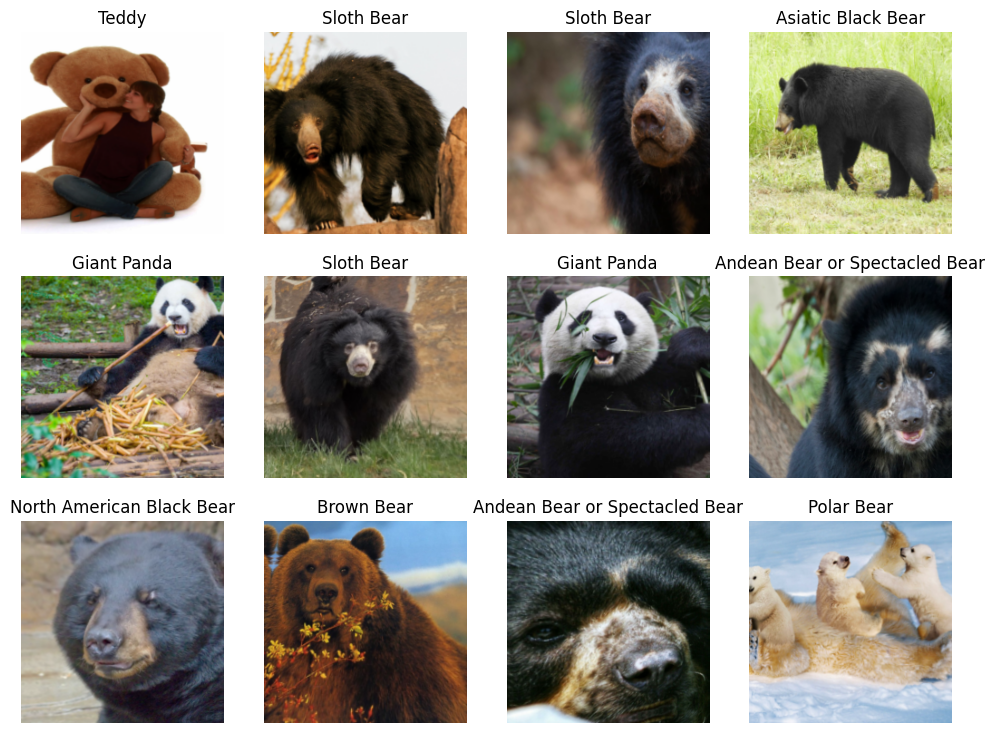

In [8]:
dls = DataBlock(
    blocks=(ImageBlock, CategoryBlock),
    get_items=get_image_files,
    splitter=RandomSplitter(valid_pct=0.2, seed=34),
    get_y=parent_label,
    batch_tfms=aug_transforms(),
    item_tfms=RandomResizedCrop(224, min_scale=0.5) # usaremos RandomResizedCrop con un tamaño de imagen de 224 px, que es bastante estándar para la clasificación de imágenes
).dataloaders(f'/content/drive/MyDrive/DeepLearningCourse/{nombre_proyecto}/')

dls.show_batch(max_n=12)

In [13]:
# Entrenar el modelo
learn = cnn_learner(dls, resnet18, metrics=error_rate)
learn.fine_tune(5)

/usr/local/lib/python3.10/dist-packages/fastai/vision/learner.py:301: UserWarning: `cnn_learner` has been renamed to `vision_learner` -- please update your code
  warn("`cnn_learner` has been renamed to `vision_learner` -- please update your code")


epoch,train_loss,valid_loss,error_rate,time
0,2.735620,0.649203,0.232394,00:27


/usr/local/lib/python3.10/dist-packages/PIL/Image.py:996: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


epoch,train_loss,valid_loss,error_rate,time
0,0.812559,0.404011,0.154930,00:27
1,0.630188,0.224695,0.077465,00:27
2,0.486716,0.192309,0.077465,00:27
3,0.409729,0.190492,0.070423,00:27
4,0.354506,0.188952,0.077465,00:28


/usr/local/lib/python3.10/dist-packages/PIL/Image.py:996: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/PIL/Image.py:996: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/PIL/Image.py:996: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/PIL/Image.py:996: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/PIL/Image.py:996: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


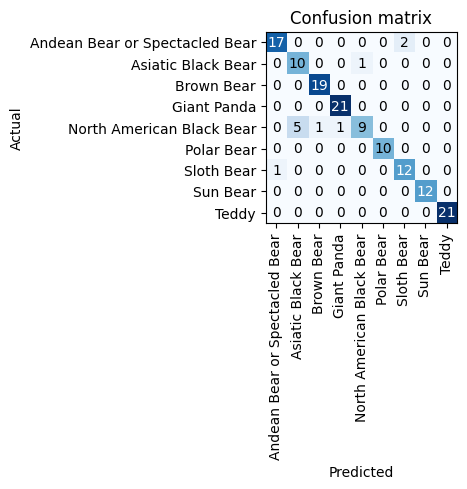

In [14]:
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix()

/usr/local/lib/python3.10/dist-packages/PIL/Image.py:996: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/PIL/Image.py:996: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/PIL/Image.py:996: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/PIL/Image.py:996: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/PIL/Image.py:996: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/PIL/Image.py:996: UserWarning: Palette images with Transparency expressed in bytes sh

SuggestedLRs(valley=0.0002290867705596611)

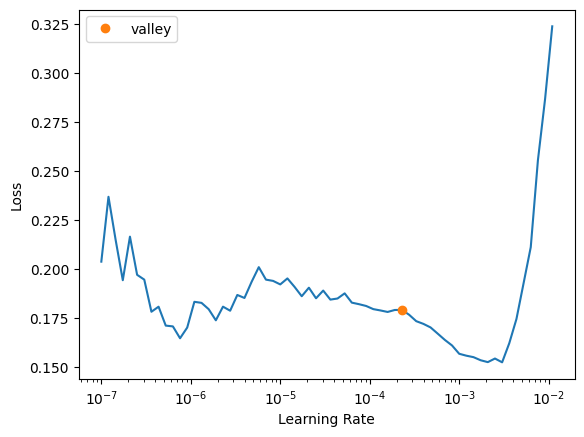

In [15]:
learn.lr_find()

In [16]:
# Exportar el modelo entrenado
learn.export(f'/content/drive/MyDrive/DeepLearningCourse/model/model{nombre_proyecto}.pkl')

FileUpload(value={}, description='Upload')

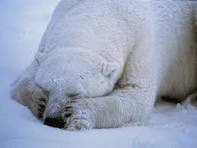

Predicción: Polar Bear
Probabilidades: tensor([3.4655e-03, 7.9499e-04, 3.6235e-03, 4.4540e-03, 5.5266e-04, 5.6795e-01,
        3.2805e-04, 1.9566e-01, 2.2318e-01])


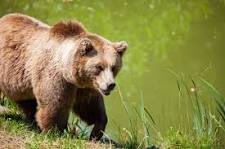

Predicción: Brown Bear
Probabilidades: tensor([5.8260e-04, 6.9044e-06, 9.9926e-01, 2.3101e-05, 7.0208e-05, 3.5983e-05,
        2.7354e-06, 1.4546e-05, 4.1308e-06])


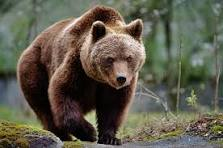

Predicción: Brown Bear
Probabilidades: tensor([4.3454e-05, 1.2426e-04, 9.9400e-01, 2.3863e-05, 5.5255e-03, 1.3661e-04,
        2.4112e-05, 7.3266e-05, 4.4591e-05])


In [18]:
from IPython.display import display
import ipywidgets as widgets


# Cargar el modelo exportado
learn = load_learner(f'/content/drive/MyDrive/DeepLearningCourse/model/model{nombre_proyecto}.pkl')

# Definir la función para manejar la carga de archivos
def on_upload_change(change):
    img = PILImage.create(io.BytesIO(upload_btn.data[-1]))
    display(img)

    # Realizar predicciones
    prediction, index, probabilities = learn.predict(img)
    print("Predicción:", prediction)
    print("Probabilidades:", probabilities)

# Crear el botón de carga de archivos
upload_btn = widgets.FileUpload()
upload_btn.observe(on_upload_change, names='_counter')

display(upload_btn)